In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt 
import shapely
from shapely.geometry import LineString, Point, Polygon
import time
from scipy import spatial
import os
# http://mathster.com/graphpaper/graphpaperjs/.

In [2]:
def take_pic(cam_object, niter) :
   avg = []
   for i in range(niter):
      time.sleep(0.1)
      if cam_object.isOpened(): 
         ret, a = cam_object.read()
         avg.append(a)
         if ret:
            pass 
         else:
            print("frame not captured")
      else:
         print("cannot open camera")
      
      if i == 0:
         dst = avg[i]
      else:
        
         alpha = 1.0/(i + 1)
         beta = 1.0 - alpha
         dst = cv2.addWeighted(avg[i], alpha, dst, beta, 0.0)
   avg_pic = dst
   return avg_pic

def nb_show_n(title_list, img_list):
   n = len(title_list)
   m = len(img_list)
   if n > 1  and m == m :
      plt.rcParams['figure.figsize'] = [n*5, 5]
      fig, ax = plt.subplots(1, n)
      plt.tight_layout()
      r = 0
      for axis in ax :
         axis.title.set_text(title_list[r])
         axis.imshow(img_list[r], cmap="gray")
         r=r+1
   plt.show()

def nb_show(title, img):
    plt.imshow(img, cmap="gray"), plt.title(title)
    # plt.xticks([]),plt.yticks([])
    plt.show()

In [3]:
cam = cv2.VideoCapture(0)
cam.set(cv2.CAP_PROP_BUFFERSIZE, 0)
cam.set(cv2.CAP_PROP_FORMAT, cv2.CV_32F)
WIDTH = 1920
HEIGHT = 1080
cam.set(cv2.CAP_PROP_FRAME_WIDTH, WIDTH)
cam.set(cv2.CAP_PROP_FRAME_HEIGHT, HEIGHT)

True

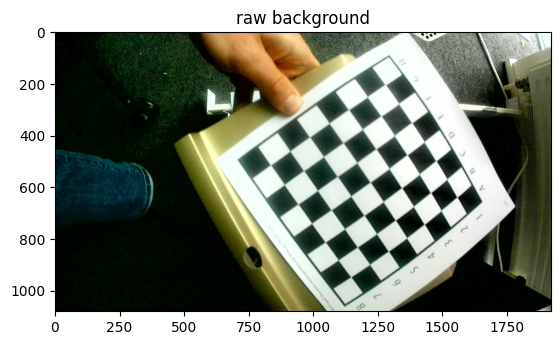

True

In [71]:
avgiter=1
imge = take_pic(cam,avgiter)
nb_show("raw background",cv2.cvtColor(imge, cv2.COLOR_RGB2BGR))
cv2.imwrite('./img22.jpg',imge)
# nb_show("sdfmpo",background_raw)

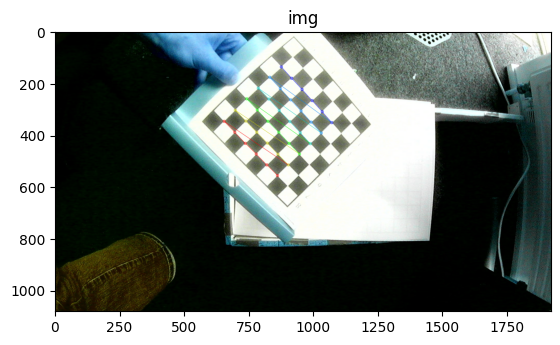

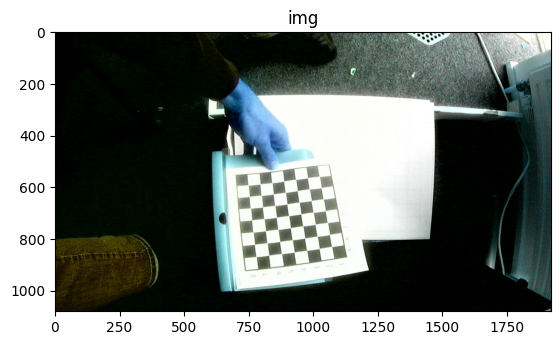

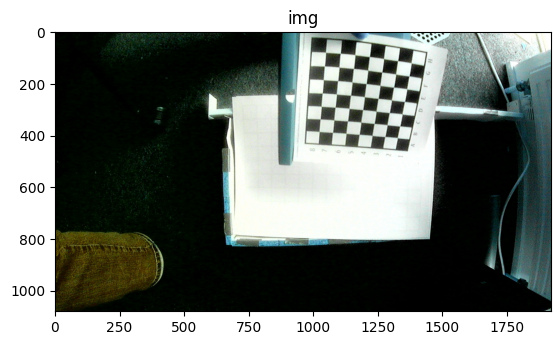

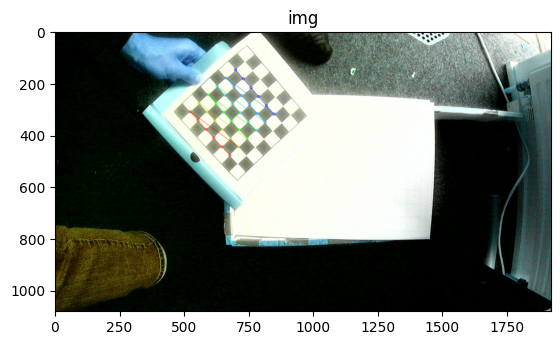

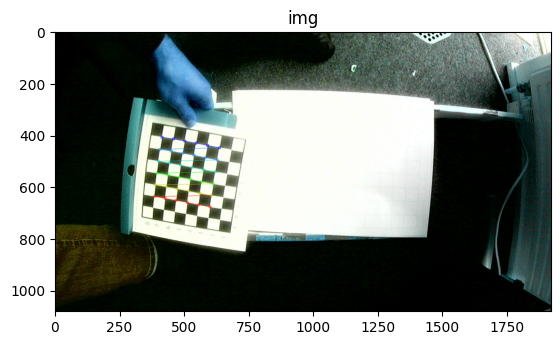

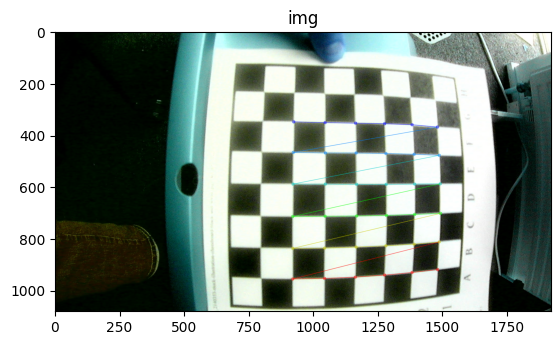

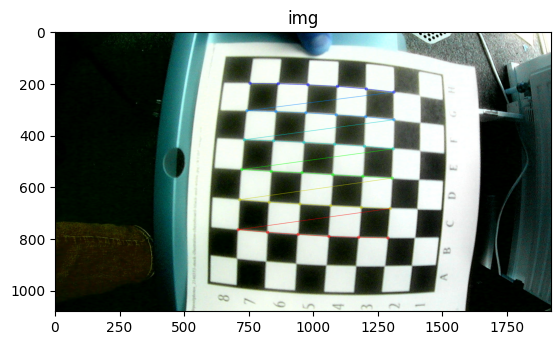

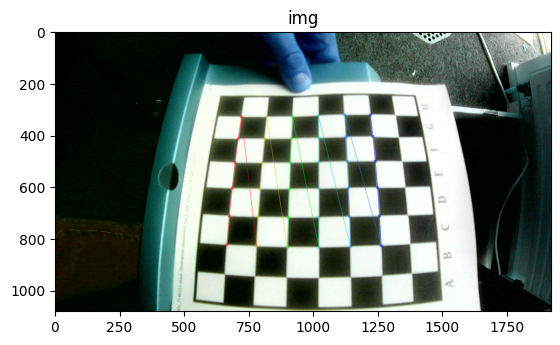

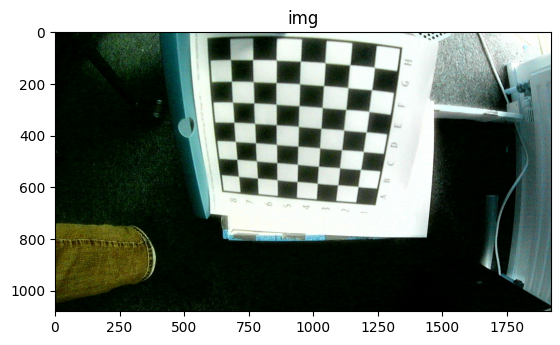

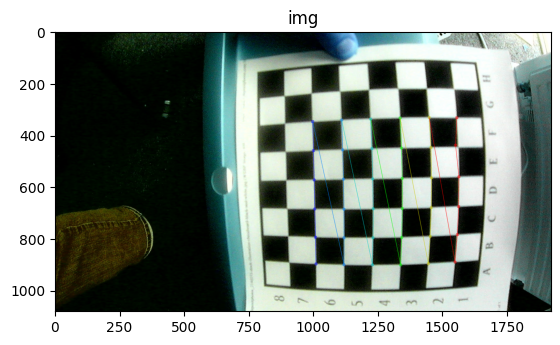

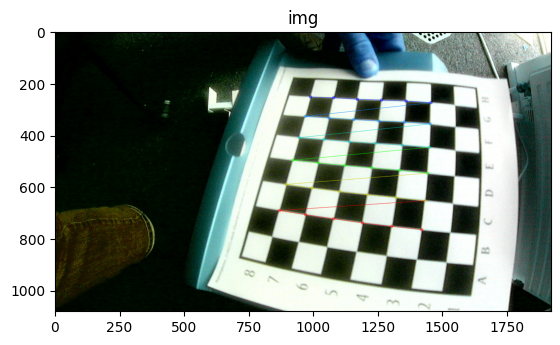

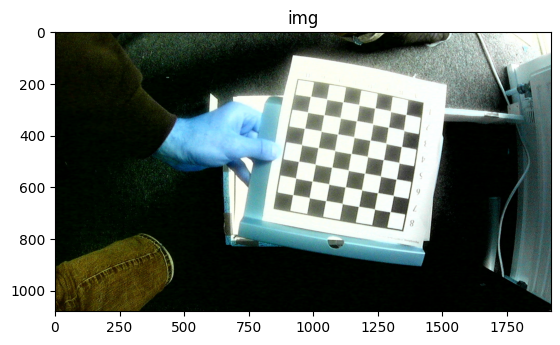

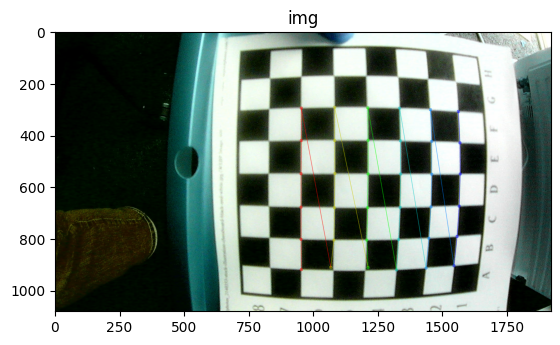

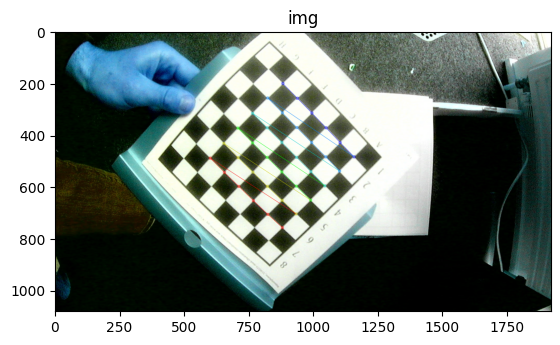

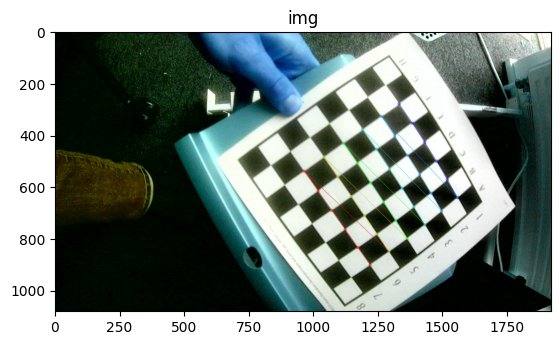

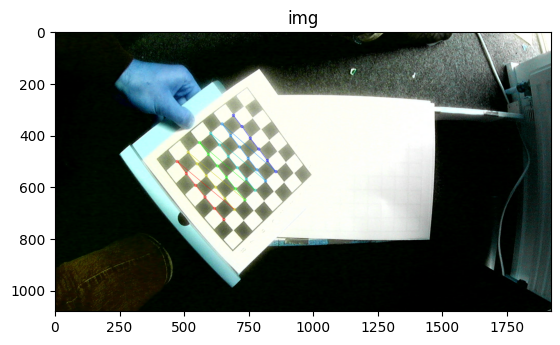

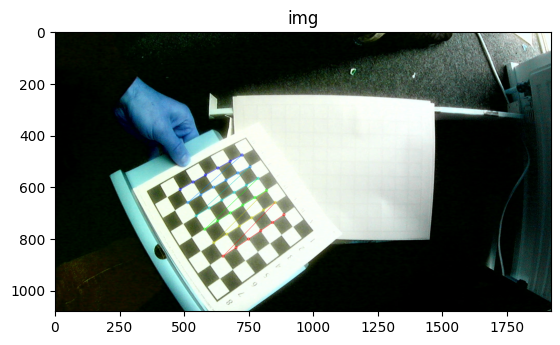

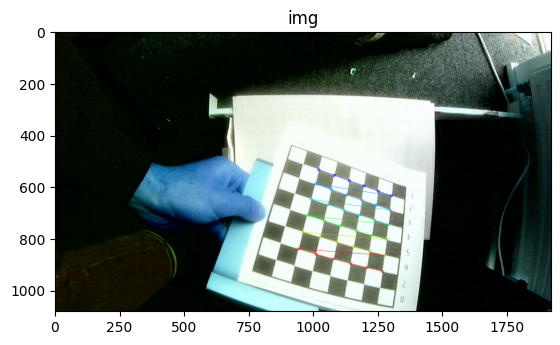

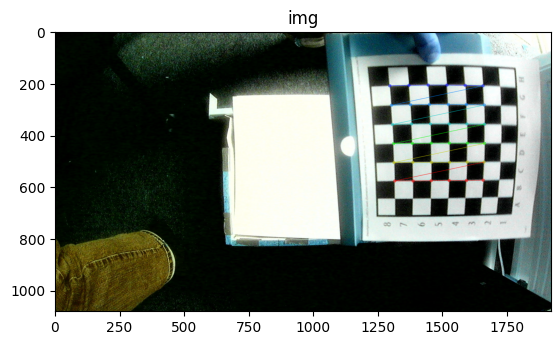

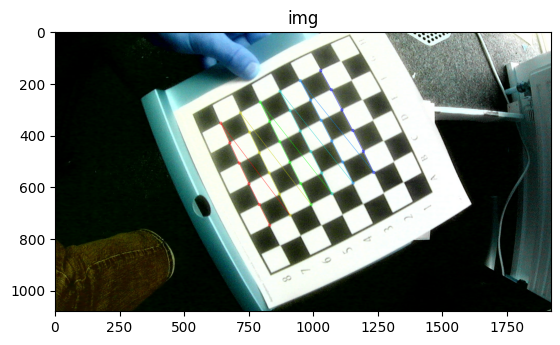

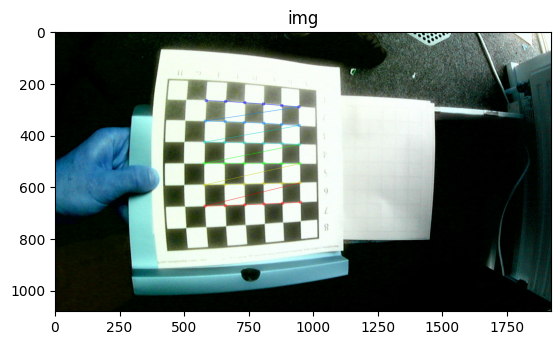

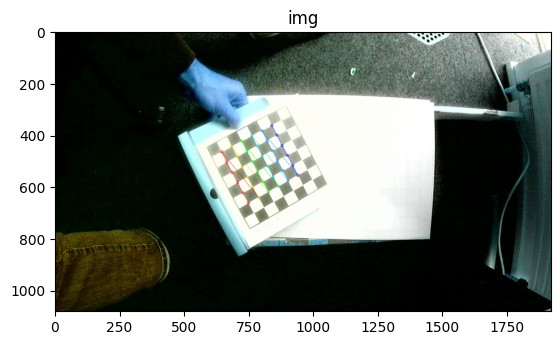

 Camera matrix:
[[1.23143086e+03 0.00000000e+00 9.89736367e+02]
 [0.00000000e+00 1.23152571e+03 5.07193512e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

 Distortion coefficient:
[[-4.23267144e-01  2.48985968e-01  4.28429986e-03 -1.81769138e-05
  -7.59441124e-02]]

 Rotation Vectors:
(array([[ 0.08954855],
       [-0.31082602],
       [ 0.79827302]]), array([[ 0.06562751],
       [-0.39442288],
       [ 0.82480681]]), array([[ 0.12820148],
       [-0.27482384],
       [ 0.1978022 ]]), array([[-0.11100268],
       [-0.05497089],
       [ 0.00758214]]), array([[-0.07575978],
       [ 0.00135618],
       [ 0.06097674]]), array([[-0.34023695],
       [ 0.39906299],
       [ 1.53677065]]), array([[-0.18316559],
       [ 0.18911687],
       [-1.58909362]]), array([[-0.43907092],
       [ 0.32287878],
       [ 0.16334774]]), array([[0.09171234],
       [0.07606331],
       [1.57190482]]), array([[ 0.08224748],
       [-0.16930937],
       [ 0.78601296]]), array([[ 0.00355786],
       

In [74]:
# Import required modules
import cv2
import numpy as np
import os
import glob
 
 
# Define the dimensions of checkerboard
CHECKERBOARD = (6, 6)
 
 
# stop the iteration when specified
# accuracy, epsilon, is reached or
# specified number of iterations are completed.
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
 
# Vector for 3D points
threedpoints = []
 
# Vector for 2D points
twodpoints = []
 
 
#  3D points real world coordinates
objectp3d = np.zeros((1, CHECKERBOARD[0]
                      * CHECKERBOARD[1],
                      3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0],
                               0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None
 
 
# Extracting path of individual image stored
# in a given directory. Since no path is
# specified, it will take current directory
# jpg files alone
images = glob.glob('*.jpg')
 
for filename in images:
    image = cv2.imread(filename)
    grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
    # Find the chess board corners
    # If desired number of corners are
    # found in the image then ret = true
    ret, corners = cv2.findChessboardCorners(
                    grayColor, CHECKERBOARD,
                    cv2.CALIB_CB_ADAPTIVE_THRESH
                    + cv2.CALIB_CB_FAST_CHECK +
                    cv2.CALIB_CB_NORMALIZE_IMAGE)
 
    # If desired number of corners can be detected then,
    # refine the pixel coordinates and display
    # them on the images of checker board
    if ret == True:
        threedpoints.append(objectp3d)
 
        # Refining pixel coordinates
        # for given 2d points.
        corners2 = cv2.cornerSubPix(
            grayColor, corners, (11, 11), (-1, -1), criteria)
 
        twodpoints.append(corners2)
 
        # Draw and display the corners
        image = cv2.drawChessboardCorners(image,
                                          CHECKERBOARD,
                                          corners2, ret)
 
    # nb_show("img",image)
 
# cv2.destroyAllWindows()
 

 
 
# Perform camera calibration by
# passing the value of above found out 3D points (threedpoints)
# and its corresponding pixel coordinates of the
# detected corners (twodpoints)





In [75]:
h, w = image.shape[:2]
ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(
    threedpoints, twodpoints, grayColor.shape[::-1], None, None)
 
 
# Displaying required output
print(" Camera matrix:")
print(matrix)
 
print("\n Distortion coefficient:")
print(distortion)
 
print("\n Rotation Vectors:")
print(r_vecs)
 
print("\n Translation Vectors:")
print(t_vecs)

 Camera matrix:
[[1.23143086e+03 0.00000000e+00 9.89736367e+02]
 [0.00000000e+00 1.23152571e+03 5.07193512e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

 Distortion coefficient:
[[-4.23267144e-01  2.48985968e-01  4.28429986e-03 -1.81769138e-05
  -7.59441124e-02]]

 Rotation Vectors:
(array([[ 0.08954855],
       [-0.31082602],
       [ 0.79827302]]), array([[ 0.06562751],
       [-0.39442288],
       [ 0.82480681]]), array([[ 0.12820148],
       [-0.27482384],
       [ 0.1978022 ]]), array([[-0.11100268],
       [-0.05497089],
       [ 0.00758214]]), array([[-0.07575978],
       [ 0.00135618],
       [ 0.06097674]]), array([[-0.34023695],
       [ 0.39906299],
       [ 1.53677065]]), array([[-0.18316559],
       [ 0.18911687],
       [-1.58909362]]), array([[-0.43907092],
       [ 0.32287878],
       [ 0.16334774]]), array([[0.09171234],
       [0.07606331],
       [1.57190482]]), array([[ 0.08224748],
       [-0.16930937],
       [ 0.78601296]]), array([[ 0.00355786],
       

In [92]:
img = cv2.imread('img20.jpg')
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(matrix,distortion,(w,h),1,(w,h))

np.save("intrinsics", np.array([matrix,distortion,newcameramtx],dtype=object))

# # undistort
# dst = cv2.undistort(img, matrix,distortion, None, newcameramtx)
# # crop the image
# x,y,w,h = roi
# dst = dst[y:y+h, x:x+w]

# [map1, map2] = cv2.initUndistortRectifyMap(matrix, distortion, img.shape[:2], newcameramtx)
# dst = cv2.remap(img, map1, map2)

# nb_show_n(['img22','calibresult'],[img,dst])